<a href="https://colab.research.google.com/github/joeljude/courses/blob/master/AI%20Product%20Manager%20Fina%20Project%20part%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Description**
In this project we will build a model to predict the electrical energy output of a Combined Cycle Power Plant, which uses a combination of gas turbines, steam turbines, and heat recovery steam generators to generate power. We have a set of 9568 hourly average ambient environmental readings from sensors at the power plant which we will use in our model.

The columns in the data consist of hourly average ambient variables:

* Temperature (T) in the range 1.81°C to 37.11°C,
* Ambient Pressure (AP) in the range 992.89-1033.30 milibar,
* Relative Humidity (RH) in the range 25.56% to 100.16%
* Exhaust Vacuum (V) in the range 25.36-81.56 cm Hg
* Net hourly electrical energy output (PE) 420.26-495.76 MW (Target we are trying to predict)
Data sources used
Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

Heysem Kaya, Pınar Tüfekci , Sadık Fikret Gürgen: Local and Global Learning Methods for Predicting Power of a Combined Gas & Steam Turbine, Proceedings of the International Conference on Emerging Trends in Computer and Electronics Engineering ICETCEE 2012, pp. 13-18 (Mar. 2012, Dubai)

Guidelines for the project:
To complete the project, you must complete each of the below steps in the modeling process.  

For the problem described in the Project Topic section above, determine what type of machine learning approach is needed and select an appropriate output metric to evaluate performance in accomplishing the task.

Determine which possible features we may want to use in the model, and identify the different algorithms we might consider.

Split your data to create a test set to evaluate the performance of your final model.  Then, using your training set, determine a validation strategy for comparing different models - a fixed validation set or cross-validation.  Depending on whether you are using Excel, Python or AutoML for your model building, you may need to manually split your data to create the test set and validation set / cross validation folds.

Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.

Evaluate the performance of your final model using the output metric you defined earlier.  

Once you have completed all steps, create and record a brief (5 minutes maximum) presentation video describing your approach to each step.  Your video must include a quick demo or screenshot of the final model you have created.  In your video, be sure to clearly address the 4 elements on which your presentation will be evaluated.

Guidelines for the project:
To complete the project, you must complete each of the below steps in the modeling process.  

1.For the problem described in the Project Topic section above, determine what type of machine learning approach is needed and select an appropriate output metric to evaluate performance in accomplishing the task.

2.Determine which possible features we may want to use in the model, and identify the different algorithms we might consider.

3.Split your data to create a test set to evaluate the performance of your final model.  Then, using your training set, determine a validation strategy for comparing different models - a fixed validation set or cross-validation.  Depending on whether you are using Excel, Python or AutoML for your model building, you may need to manually split your data to create the test set and validation set / cross validation folds.

4.Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.

5.Evaluate the performance of your final model using the output metric you defined earlier.  

Once you have completed all steps, create and record a brief (5 minutes maximum) presentation video describing your approach to each step.  Your video must include a quick demo or screenshot of the final model you have created.  In your video, be sure to clearly address the 4 elements on which your presentation will be evaluated.

In [2]:
# Let's first analyze the data

In [3]:
import pandas as pd
# Reading csv file
url  = "https://storage.googleapis.com/aipi_datasets/CCPP_data.csv"
df_CCPP_master = pd.read_csv(url)

In [46]:
df_CCPP_master.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [48]:
#Column Description
df_CCPP_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [49]:
# Histogram
df_CCPP_master.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


<Axes: xlabel='AT', ylabel='PE'>

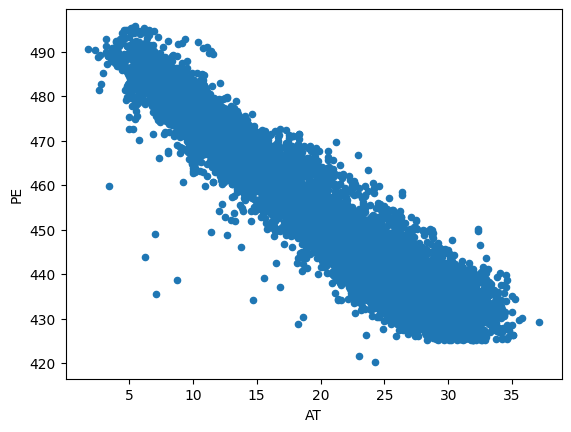

In [47]:
df_CCPP_master.plot(x='AT',y='PE',kind='scattezr')

<Axes: xlabel='PE', ylabel='V'>

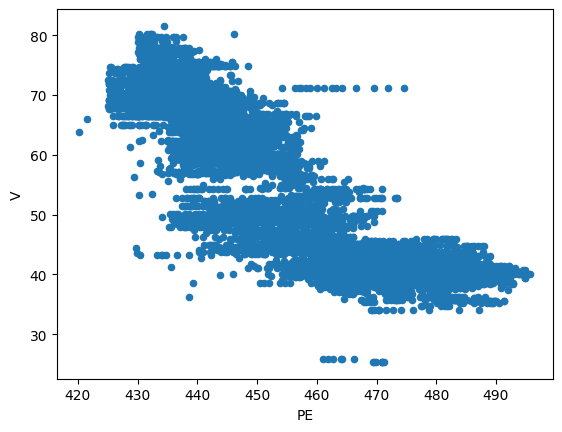

In [26]:
df_CCPP_master.plot(x='PE',y='V',kind='scatter')

<Axes: xlabel='PE', ylabel='AP'>

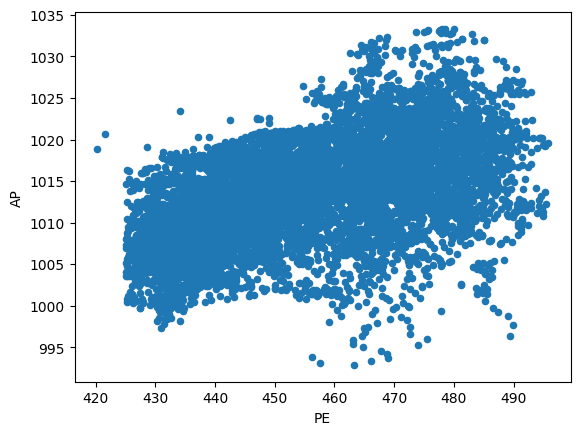

In [27]:
df_CCPP_master.plot(x='PE',y='AP',kind='scatter')

<Axes: xlabel='PE', ylabel='RH'>

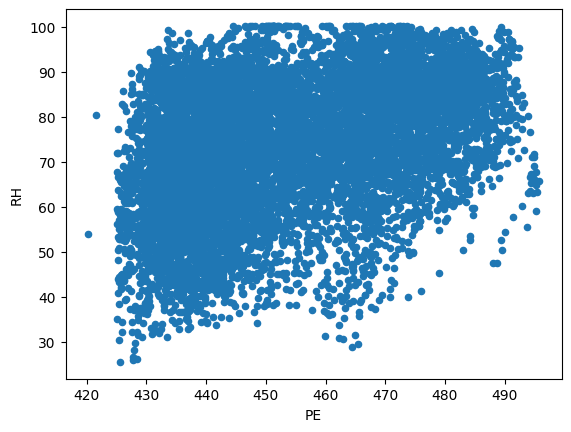

In [28]:
df_CCPP_master.plot(x='PE',y='RH',kind='scatter')

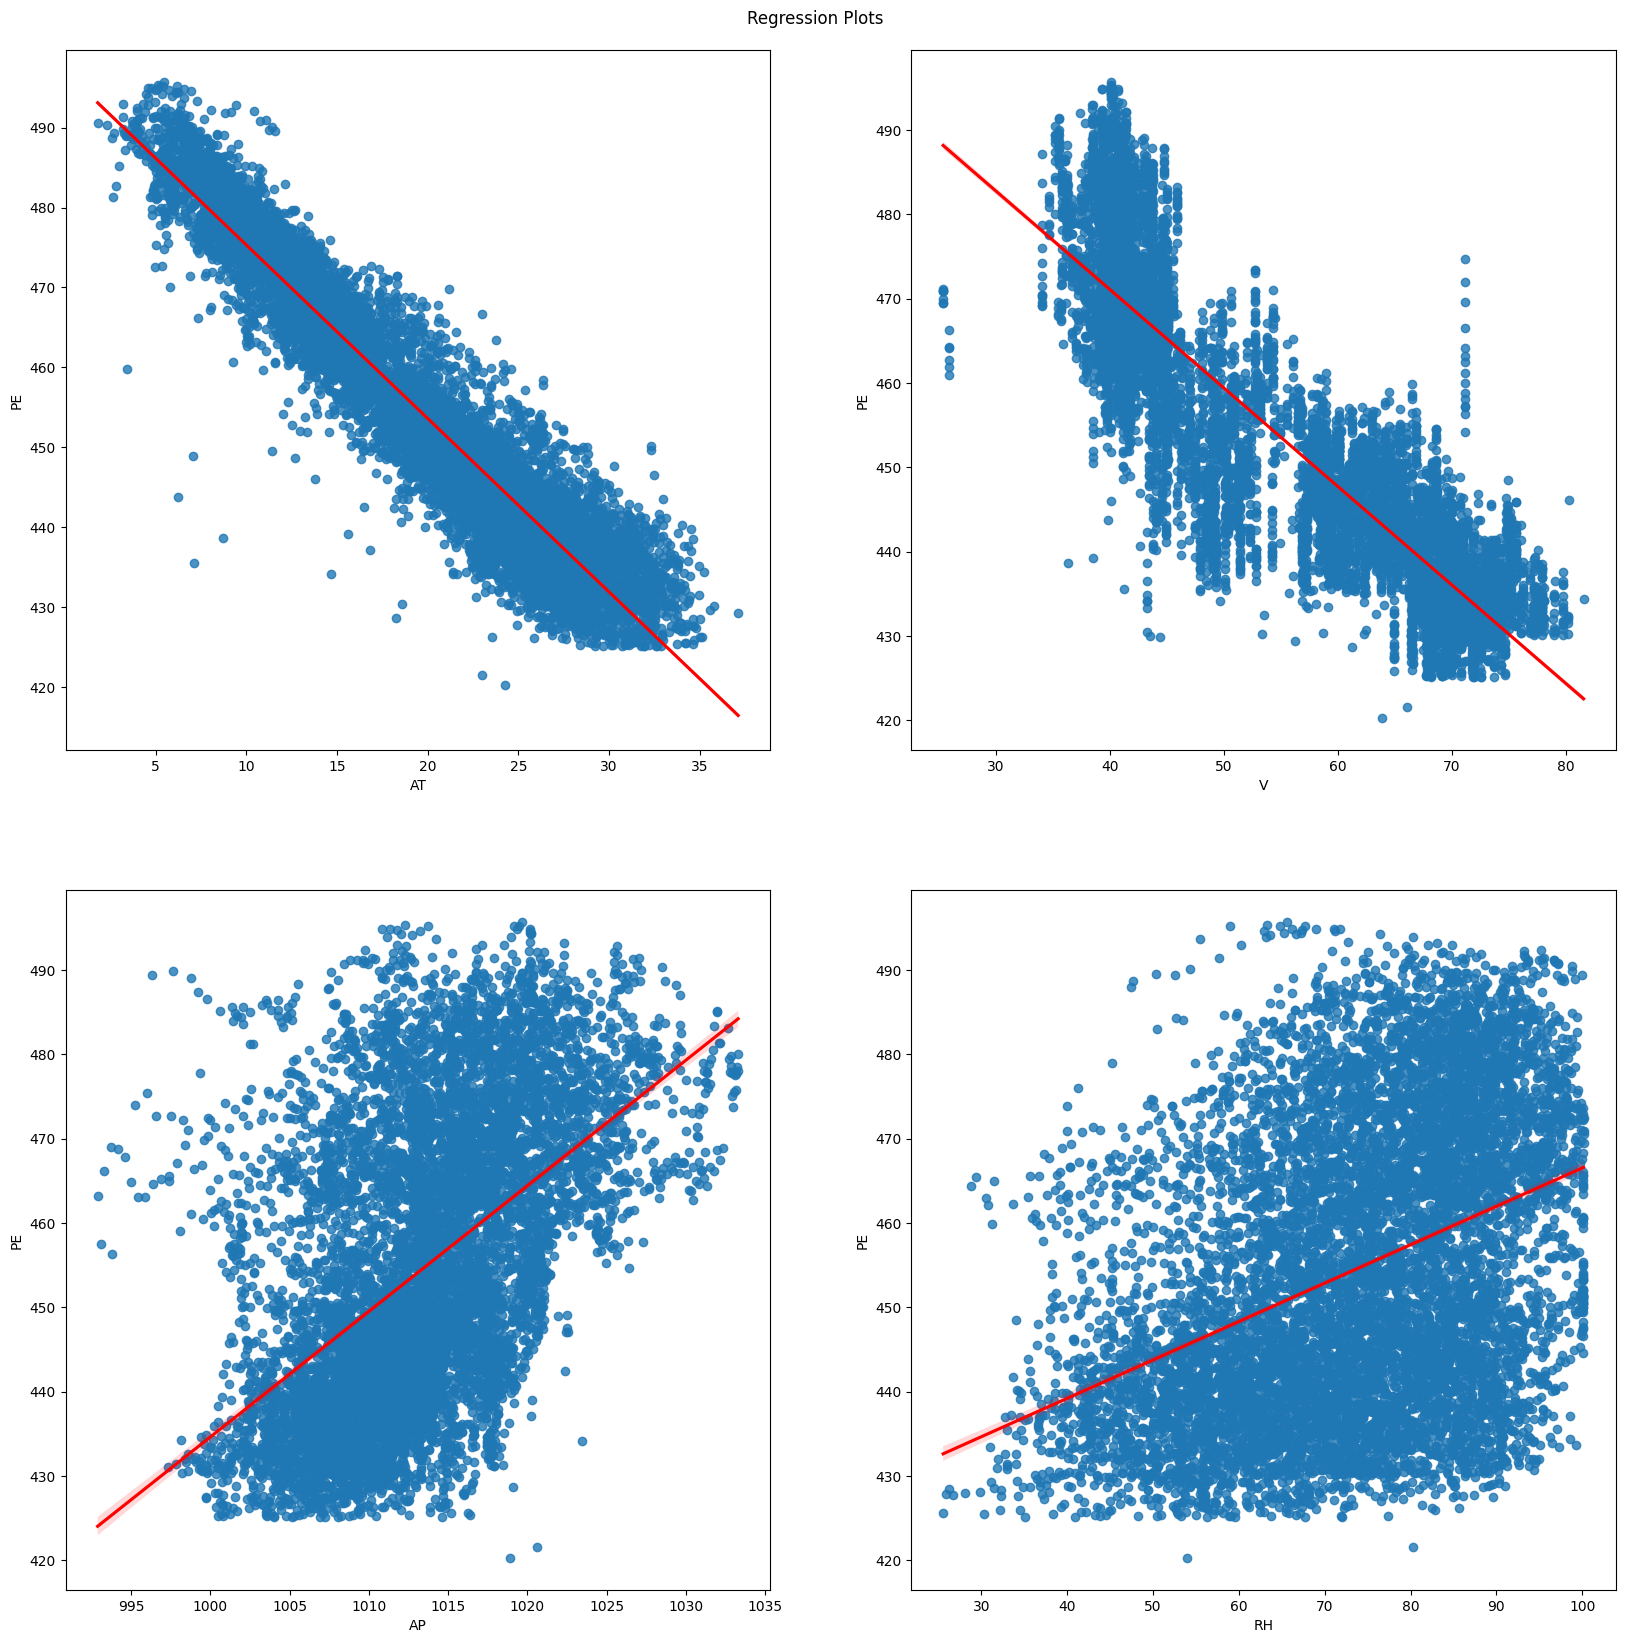

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
line_color = {'color': 'red'}
fig , ax = plt.subplots(2,2, figsize=(20,20))

plt.suptitle("Regression Plots", y=0.9)

ax1 = sns.regplot(x=df_CCPP_master.AT, y=df_CCPP_master.PE, line_kws=line_color, ax=ax[0,0])
ax1.set_xlabel("AT")
ax1.set_ylabel("PE")




ax2 = sns.regplot(x=df_CCPP_master.V, y=df_CCPP_master.PE, line_kws=line_color, ax=ax[0,1])
ax2.set_xlabel("V")
ax2.set_ylabel("PE")




ax3 = sns.regplot(x=df_CCPP_master.AP, y=df_CCPP_master.PE, line_kws=line_color, ax=ax[1,0])
ax3.set_xlabel("AP")
ax3.set_ylabel("PE")



ax4 = sns.regplot(x=df_CCPP_master.RH, y=df_CCPP_master.PE, line_kws=line_color, ax=ax[1,1])
ax4.set_xlabel("RH")
ax4.set_ylabel("PE")

plt.show()


* 1.For the problem described in the Project Topic section above, determine what type of machine learning approach is needed and select an appropriate output metric to evaluate performance in accomplishing the task.
* 2.Determine which possible features we may want to use in the model, and identify the different algorithms we might consider.
* 3.Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.
* 4.Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.






In [51]:
# Staging feature variable to X
X = df_CCPP_master[['AT',	'V',	'AP',	'RH']]


In [52]:
# Staging response variable to y
Y = df_CCPP_master['PE']


In [53]:
# Select multiple models and find the model with the least Error
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

# 3.Split your data to create a test set to evaluate the performance of your final model.  Then, using your training set, determine a validation strategy for comparing different models - a fixed validation set or cross-validation.  Depending on whether you are using Excel, Python or AutoML for your model building, you may need to manually split your data to create the test set and validation set / cross validation folds.
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# 4.Use your validation approach to compare at least two different models (which may be either 1) different algorithms, 2) the same algorithm with different combinations of features, or 3) the same algorithm and features with different values for hyperparameters).  From among the models you compare, select the model with the best performance on your validation set as your final model.

models = [
    LinearRegression(),
    Ridge(alpha=10),
    Lasso(alpha=0.01),
    DecisionTreeRegressor(),
    SVR(),
    RandomForestRegressor()
]

model_names = [
    "Linear Regression",
    "Ridge Regression",
    "Lasso Regression",
    "Decision Tree Regressor",
    "Support Vector Regressor",
    "Random Forest Regressor"
]

results = []
for model, name in zip(models, model_names):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mape = mean_squared_log_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    results.append([name, mae, mse, mape, r2])

# 5.Evaluate the performance of your final model using the output metric you defined earlier.
df_results = pd.DataFrame(results, columns=["Model", "MAE", "MSE", "MAPE", "R2"])
print(df_results.to_string())


                      Model        MAE         MSE      MAPE        R2
0         Linear Regression   3.595913   20.273706  0.000098  0.930105
1          Ridge Regression   3.595903   20.273492  0.000098  0.930105
2          Lasso Regression   3.595863   20.273695  0.000098  0.930105
3   Decision Tree Regressor   3.053130   20.210658  0.000098  0.930322
4  Support Vector Regressor  11.119330  177.077483  0.000835  0.389510
5   Random Forest Regressor   2.331305   10.480915  0.000050  0.963866


5.Evaluate the performance of your final model using the output metric you defined earlier.  


MAE: 2.532579153605015
MSE: 13.1491394923459
MAPE: 6.365598942115995e-05
R2: 0.9547891576200515


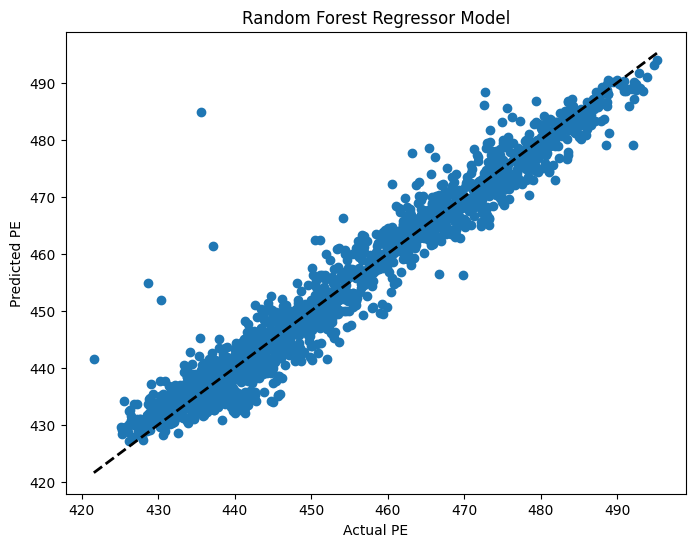

In [42]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Splitting the training set into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=42)

# Training the Random Forest Regressor model
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Evaluating the model on the validation set
y_pred = model.predict(X_val)
mae = mean_absolute_error(y_val, y_pred)
mse = mean_squared_error(y_val, y_pred)
mape = mean_squared_log_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

# Printing the evaluation metrics
print("MAE:", mae)
print("MSE:", mse)
print("MAPE:", mape)
print("R2:", r2)

# Plotting the actual and predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_val, y_pred)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], "k--", lw=2)
plt.xlabel("Actual PE")
plt.ylabel("Predicted PE")
plt.title("Random Forest Regressor Model")
plt.show()


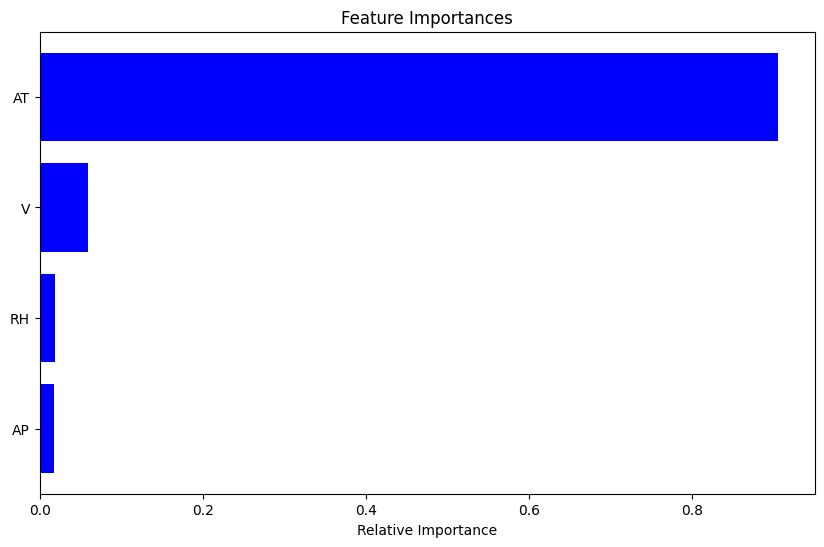

In [45]:
#Feature Importance for the model selected

importances = model.feature_importances_
features = X_train.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()
